In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import comb

<h1>Math</h1>

now we will discuss Gaussian Mixture Model (GMM) , and we will see that a GMM is a generalisation of kmeans

Lets take an example , we want to measure heights of all students in a class , and assuming the data is gaussian distribured , we want to fit a gaussian model to the students heights , we call this maximum likelihood estimation (MLE)

Now , how do we do MLE ?

lets say we collected some data ,

$Dataset : \{x_1,...,x_N\}$

Then we can write our likelihood as follows :

$$L = \prod^{N}_{i=1} \frac{1}{\sqrt{2\pi\sigma^2}} \exp{\left(-\frac{1}{2} \frac{(x_i - \mu)^2}{\sigma^2}\right)}$$

That is the product over each sample i form 1 to N of the gaussian PDF on each sample i , in this expression the mean $\mu$ and variance $\sigma^2$ , now how do we find them ?

Since we want to maximise L wrt $\mu$ and $\sigma^2$ we want turn to calculus , thus we take the derivative , set to 0 and solve for $\mu$ and $\sigma$ 

why maximise L ?

we want to maximise L because it is the joint probability of seeing the all data we observed given a set of parameters , it makes sense that , out of all the possible parameters $\mu$ and $\sigma^2$ , that the true $\mu$ and $\sigma^2$ would yield the highest probability

first we take the log of the probability , this makes our calculations easier , and is ok since log is a monotoically increasing function , so if A>B then log(A) > log(B)

so , taking the log we yeild:

$$\log(L) = \sum^{N}_{i=1} \left( -\frac{1}{2} \log(2\pi\sigma^2) - \frac{1}{2} \frac{(x_i - \mu)^2}{\sigma^2}\right)$$

now we want to take derivatives wrt $\mu$ and $\sigma^2$ and set them to 0

$$\frac{\partial L}{\partial \mu} = 0 , \frac{\partial L}{\partial \sigma^2} = 0$$

$$\frac{\partial \ log L}{\partial \mu} = \sum^{N}_{i=1} \frac{x_i - \mu}{\sigma^2} = 0$$

from this we can get :

$$\hat \mu = \frac{1}{N} \sum^{N}_{i=1}x_i$$

when we express the maximum likelihood estimates its customary to put $\hat {}$ to differentiate them from true values , but not necessary since one can probably infere from context

Next we do the same for $\sigma^2$

let : v = $\sigma^2$

$$\frac{\partial log \ L}{\partial v} = \sum^{N}_{i=1}  - \frac{1}{2} \frac{1}{v} - \frac{1}{2}(x_i - \mu)^2(-1) \frac{1}{v^2} = 0$$

mulyiplying the above by $-2 v^2$ we yeild

$$\sum^{N}_{i=1} v - (x_i - \mu)^2 = 0$$

from this we get

$${\hat \sigma}^2 = \hat v = \frac{1}{N} \sum^{N}_{i=1} (x_i - \mu)^2$$

note that $\sigma^2$ depends on the true mean  $\mu$ since we dont know that we usually replace it by the predicted mean ${\hat \mu}$

ok thats great , but what if instead of a gaussian we want a more accurate model , consider the following

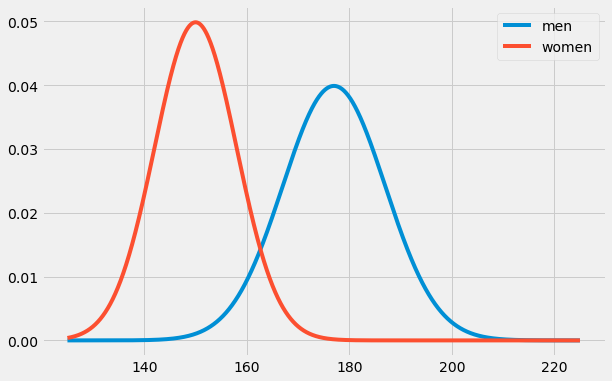

In [5]:
x = np.arange(125, 225, 0.001)
y1 = norm.pdf(x,177,10)
y2 = norm.pdf(x,150,8)
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x,y1,label='men')
ax.plot(x,y2,label='women')
plt.style.use('fivethirtyeight')
plt.legend()
plt.show()

if we look at this distribution we see it has 2 bumps , this is called a multimodal distribution , clearly no single gaussian can fit well to this data , but what if we had multiple gaussians ?

ex : 2 Gaussians

$$p(x) = \pi_1N(x;\mu_1,\sigma_1^2) + \pi_2N(x;\mu_2,\sigma_2^2)$$ 

The mixture proportions ($\pi_1 \ and \ \pi_2$) must sum up to 1 

why ?

since the GMM needs to be a valid probability distribution , its integral form $-\infty$ to $\infty$ must some up to 1 , so

$$\int^{+\infty}_{-\infty}\left[ \pi_1N(x:\mu_1,\sigma_1^2) + \pi_2 N(x:\mu_2,\sigma_2^2)\right] dx = 1$$

$$\pi_1 \int^{+\infty}_{-\infty}\left[ N(x:\mu_1,\sigma_1^2) \right] + \pi_2 \int^{+\infty}_{-\infty}\left[ N(x:\mu_2,\sigma_2^2) \right] dx = 1$$

$$\pi_1 + \pi_2 = 1$$

Dont mix the mixture proportion $\pi_i$ with pi the constant = 3.14.... $\pi$

Now that we have a model , we repeat the same process , that is maximise L wrt parameters

but unlike the single gaussian case now we have many parameters

for each gaussian we have a mean , variance and a mixture proportion , so if we have 2 gaussians we will have 6 parameters : $\pi_1,\mu_1,\sigma_1^2,\pi_2,\mu_2,\sigma_2^2,$ , and if we have K gaussians we will have 3K parameters (assuming univariate case)

the next step is to write the likelihood so we can take log , set derivative to 0 and solve for our parameters

$$L = \prod^N_{i=1} \left[ \pi_1 \frac{1}{\sqrt{2\pi\sigma_1^2}} \exp \left( - \frac{1}{2} \frac{ {\left( x_i- \mu_1\right)}^2 }{\sigma_1^2} \right) + \pi_2 \frac{1}{\sqrt{2\pi\sigma_2^2}} \exp \left( - \frac{1}{2} \frac{ {\left( x_i- \mu_2\right)}^2 }{\sigma_2^2} \right) \right]$$

ok so far so good , now lets take the log

$$log \ L = \sum^N_{i=1} \log \sum^N_{k=1} \pi_k \frac{1}{\sqrt{2\pi\sigma_k^2}} \exp \left( -\frac{1}{2} \frac{{\left( x_i - \mu_k \right)}^2 } {\sigma_k^2}\right)$$

This cant be simplified !!!

Usually taking the log turns the product into a summation , but this time we have a sum of logs inside and we have no rule to simplify the sum of logs , infact there is no closed for msolution to this problem , we cant set the derivative to 0 and solve for the parameters , instead we have to use and $iterative$ method and hope that it $converges$ to a good solution

we can use a general approach like gradient descent but instead we will use EM (Expectation Maximisation) which is more commonly discussed

Unlike gradient descent where we just get the gradients and apply some update rules , in EM its more complicated to derive rules (which is one of its weaknesses)

first we will look at the algorithm then worry later about where it came from


Assume we have vector observations , so we consider the multivariate gaussian , know X~N($\mu,\Sigma$) , $\Sigma$ is the covariance 

Now here is a psuedocode for the algorithm:

loop:
    #E-step

$$\gamma(i,k) = \frac{\pi_k N(x:\mu_k,\Sigma_k)}{\sum^{K}_{j=1} \pi_j(x_i:\mu_j \sum_j)}$$

    #M-step
    
$$\mu_k = \frac{1}{N_k} \sum^N_{i=1} \gamma(i,k) x_i$$

$$\sigma_k = \frac{1}{N_k} \sum^N_{i=1} \gamma(i,k) (x_i - \mu_k) (x_i - \mu_k)^T$$

$$\pi_k = \frac{N_k}{N} , where \ N_k = \sum^N_{i=1} \gamma(i,k)$$

in the E-step (expectation step) we calculate the responsabilities $\gamma$ , $\gamma$ is indexed by i aand k , so it should be clear that $\gamma(i,k)$ is how much cluster k is reponsible for point y , that is also how much does data point i belong to cluster k , of course the sum of responsibilities of a point to all K  clusters must sum up to 1 , so we divide by sum of responsibilities to get a probability
, so for ex , if K = 3 ,then for any point i  $\gamma(i,0) + \gamma(i,1) + \gamma(i,2) = 1$

The M-step (maximisation step) is where we update our parameters , these updates are the original updates weighted by responsibilities , this is logical , the more i belong to a class the more I should contribute to the calculation of its paprameters

now its worth mentioning what probability does $\pi_k$ actually represent ?

we have a categorical hidden/latent variable called z ('cluster identity')

$$\pi_k = p(z=k)$$

$$p(x) = \sum^{K}_{k=1} \pi_k N(x:\mu_k,\sigma_k) = \sum^K_{k=1} p(z = k) p(x|z=k)$$

so $\pi_k$ is the categorical probability distribution over z (another reason why $\pi_i$s need to sum up to 1)

so each gaussian $N(x:\mu_k,\sigma_k)$ is the probability of x given it belongs to some class z , p(x|z) ,  in order to calculate p(x) we need to multiply by p(z) so we yeild p(z)p(x|z) then we sum up over all possible values of z which is just marginalisation

We dont want to confuse $\pi$ and $\gamma$

$\pi_k = p(z_i = k)$ , so $\pi_k$ is the distribution over z without any knowledge of any point x , in Bayesian terminology we may refer to $\pi$ as the prior

$\gamma(i,k) = p(z_i = k|x_i)$ , $\gamma$ is actually a posterior , it is the probability that the cluster identity is k given point $x_i$ , or more simply it is the probability that point $x_i$ belongs to cluster k

in fact we plg-in the expression for $\gamma$ we get the E-step

$$\gamma = p(z_i = k | x_i)$$

using rule of conditional probability :

$$\gamma = p(z_i = k |x_i) = \frac{p(z_i=k , x_i) }{p(x_i)}$$

$$ = \frac{p(z_i = k , x_i) } {\sum\limits^{K}_{j=1} p(z_i = j , x_i)}$$

$$ = \frac{p(z_i=k)p(x_i|z_i=k)}{\sum\limits^{K}_{j=1} p(z_i = j)p(x_i|z_i = j)} $$

$$ = p(z_i = k | x_i) = \frac{\pi_k N(x_i;\mu_k,\Sigma_K)}{\sum\limits^{K}_{j=1} \pi_j N(x_i;\mu_j,\Sigma_j)}$$


This is basically Bayes Rule !!!



<h1>code</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [168]:
class gmm():
    def fit(self,X,K,max_iter=20,smoothing=1e-2):
        N,D = X.shape
        gamma = np.zeros((N,K))
        mu = np.zeros((K,D))
        cov = np.zeros((K,D,D))
        pi = np.ones((K))/K
        ll = [] # store log likelihoods
        for k in range(K):
            mu[k] = X[np.random.choice(N)]
            cov[k] = np.eye(D)
            
        for it in range(max_iter):
            # E-step
            for k in range(K):
                gamma[:,k] = pi[k]*multivariate_normal.pdf(X,mu[k],cov[k])
            ll.append(np.log(gamma.sum(axis=1)).sum())
            gamma = gamma/gamma.sum(axis=1,keepdims=True)
            #M-step
            for k in range(K):
                Nk = gamma[:,k].sum()
                pi[k] = Nk/N
                mu[k] = (gamma[:,k]@X)/Nk
                gamma_k = np.expand_dims(gamma[:,k],axis=-1)
                delta = X-mu[k]
                
                cov[k] = (gamma_k*delta).T @ delta
                cov[k] = cov[k]/Nk + np.eye(D)*smoothing # so we guarantee diagonals != 0
        
            if it>0:
                if np.abs(ll[-1]-ll[-2]) < 0.1:
                    break
        plt.plot(ll)
        plt.show()
        
        random_colors = np.random.random((K, 3))
        colors = gamma @random_colors
        plt.scatter(X[:,0], X[:,1], c=colors)
        plt.show()

        print('Mean: ',mu)
        print('Pi: ',pi)
        print('Cov' , cov)
        

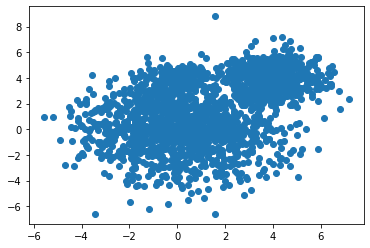

In [169]:
D = 2
s = 4
mu1 = np.array([0,0])
mu2 = np.array([s,s])
mu3 = np.array([0,s])

N = 2000
X = np.zeros((N,D))
X[:1200,:] = np.random.randn(1200,D)*2 + mu1
X[1200:1800,:] = np.random.randn(600,D) + mu2
X[1800:,:] = np.random.randn(200,D)*0.5 + mu3
labels = [0]*1200 + [1]*600 + [2]*200
plt.scatter(X[:,0],X[:,1])
plt.show()


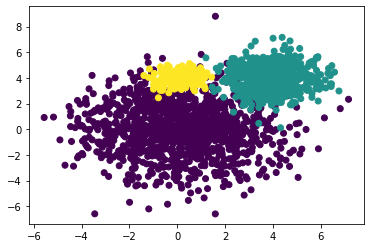

In [170]:
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

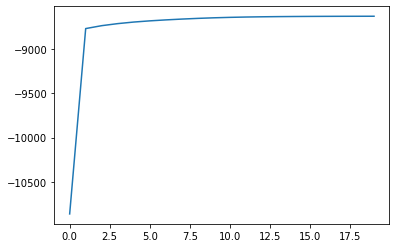

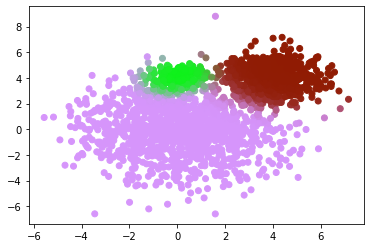

Mean:  [[ 0.02961054  3.94233271]
 [ 3.95670647  4.00339275]
 [ 0.14156312 -0.06380689]]
Pi:  [0.10381921 0.3081312  0.58804958]
Cov [[[ 0.33592692  0.04907811]
  [ 0.04907811  0.28676013]]

 [[ 1.02382275 -0.03081449]
  [-0.03081449  0.99896283]]

 [[ 3.99726517 -0.2635194 ]
  [-0.2635194   3.90973343]]]


In [175]:
model = gmm()
K=3
model.fit(X,K)

In [177]:
# observe how the parameters make sense
# pi is approximately 10% 30% 10% which correspond to the number of data points in each cluster
# the means are approximately [0,4] , [4,4] , [0,0] which are also the means we used to generate data
# Also looking at the covariances , one with small variance less than 1 , one with variance = 1 , one with variance about 4

<h1>Math</h1>

now we will discuss a oractical problem that occurs with GMMs 

if you use GMMs you may encounter an error message saying 'singular covariance' , we want to know that does this mean , why does it happen , and how do we solve this problem

Singular covariance is the matrix equivalent of dividing by 0 , $C^{-1}$ is the equivalent of $1/C$

ok so when does it occur ?

lets consider the univariate and multivariate case , observe how in both case we do "1 over something"

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{- \frac{1}{2\sigma^2} {(x-\mu)}^2}$$

$$f(x) = \frac{1}{\sqrt{2\pi\ \vert \Sigma \vert}} e^{- \frac{1}{2} {(x-\mu)}^T \Sigma^{-1} {(x-\mu)}}$$

in fact we do this twice , once in the coeffecient and once in the exponent term

in the univariate case if variance = 0 we wend up dividing by 0

in the multivariate case , if cov is a singular matrix , then its determinant = 0 , then if we try to divide by determinant in coeffecient we divide by 0 , in the exponential term we are taking the inverse of covariance , not possible when covariance is singular

ok so why do we get variance = 0 ?

1) if we only have a single data point , then the mean becomes the point it self , and so $x - \mu = 0 , \sigma^2 = 0^*0/1 = 0$ 

2) All data points are the same , again , $x - \mu = 0 , \sigma^2 = 0^*0/N = 0$ 

and why do we get singular covariance ?

we get a singular covariance when the algorithm thinks that a cluster consists only of 1 data point or multiple data points which are all equal , even when we have multiple data points very close together , the variance will be a number close to 0 , when we try to take 1/(almost) 0 we get (almost) infinity which is also problematic

ok how to fix it ?

we need to restrict the shape of covariance

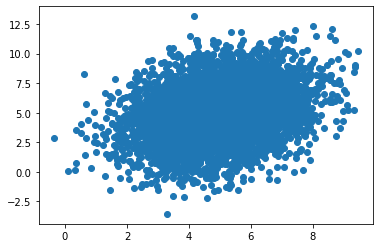

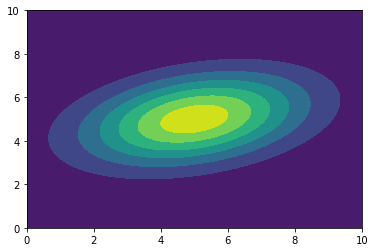

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

cov = np.array([[2,1],[1,5]])
X = np.random.multivariate_normal([5,5] ,cov,5000)
plt.scatter(X[:,0],X[:,1])
plt.show()
X = np.linspace(0,10,num=5000)
X_1 = np.repeat(X,len(X))
X_2 = np.tile(X,len(X))
X_all = np.vstack((X_1,X_2)).T
z = multivariate_normal.pdf(X_all,[5,5],cov)
z = z.reshape(len(X),len(X))
h = plt.contourf(X,X,z)
plt.show()

First type is the full covariance , this is what we were working with so far , here there are no restrictions on the covariance , we store $D^2$ parameters  , the PDF contours will be eleptical and rotated at arbitary angles which are determind by off-diagonals

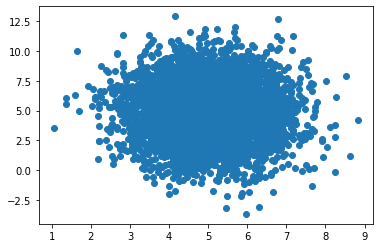

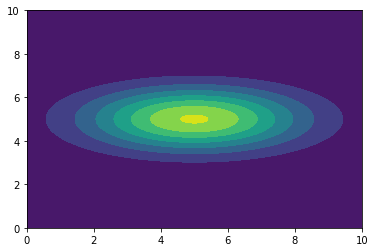

In [119]:
cov = np.array([[1,0],[0,5]])
X = np.random.multivariate_normal([5,5] ,cov,5000)
plt.scatter(X[:,0],X[:,1])
plt.show()
X = np.linspace(0,10,num=5000)
X_1 = np.repeat(X,len(X))
X_2 = np.tile(X,len(X))
X_all = np.vstack((X_1,X_2)).T
z = multivariate_normal.pdf(X_all,[5,5],cov)
z = z.reshape(len(X),len(X))
h = plt.contourf(X,X,z)
plt.show()

second type is Diagonal covariance , here covariance has non-zero elements only on diagonals , in this case all we need to store is the diagonal since all other elements are 0s , so we store only $D$ parameters , the pdf contours will be eleptical and always axis-aligned 

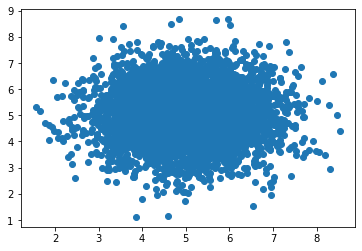

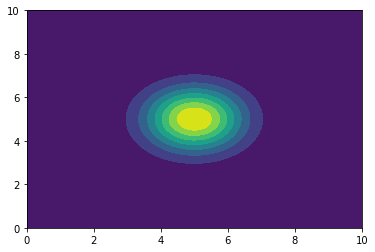

In [132]:
cov = np.array([[1,0],[0,1]])
X = np.random.multivariate_normal([5,5] ,cov,5000)
plt.scatter(X[:,0],X[:,1])
plt.show()
X = np.linspace(0,10,num=5000)
X_1 = np.repeat(X,len(X))
X_2 = np.tile(X,len(X))
X_all = np.vstack((X_1,X_2)).T
z = multivariate_normal.pdf(X_all,[5,5],cov)
z = z.reshape(len(X),len(X))
h = plt.contourf(X,X,z)
plt.show()

lastly we have spherical , similar to diagonal but with the additional restriction that all diagonal elemets are the same , so we need to store only 1 parameter , a contour of the pdf produces a spherical shape

we also have tied , this emposes the restriction that all covariances are the same  , so we can have tied full or tied diagonal or tied spherical , previously we showed only one covariance , but recall that in GMM we have multiple gaussians and thus multiple covariances

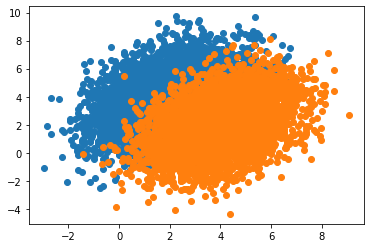

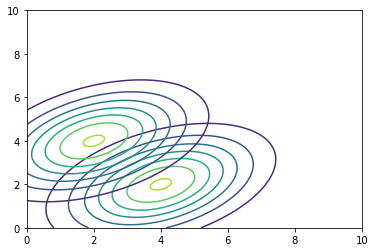

In [175]:
cov = np.array([[2,1],[1,3]])
mu1 = [2,4]
mu2 = [4,2]
X1 = np.random.multivariate_normal(mu1 ,cov,5000)
X2 = np.random.multivariate_normal(mu2 ,cov,5000)
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])
plt.show()

X = np.linspace(0,10,num=5000)
X_1 = np.repeat(X,len(X))
X_2 = np.tile(X,len(X))
X_all = np.vstack((X_1,X_2)).T
z1 = multivariate_normal.pdf(X_all,mu1,cov)
z2 = multivariate_normal.pdf(X_all,mu2,cov)
z1 = z1.reshape(len(X),len(X))
z2 = z2.reshape(len(X),len(X))
plt.contour(X,X,z1)
plt.contour(X,X,z2)
plt.show()

this is an example of tied-full both gaussians have same covariances , the positions are different as they have different means

one benefit of using axis-aligned or speherical covariance is that it eases calculating densities

with full covariance we need to calculate determinant and inverse

But in axis-aligned calculations are much easier , say that we have an axis-aligned covariance, and that the diagonals are stored in array $\sigma^2$ of size D , then

$$\vert \Sigma_{diag}\vert = \prod^{D}_{d=1} \sigma^2_d$$

$${(x-\mu)}^T \Sigma^{-1}_{diag}(x - \mu) =  \sum^{D}_{d=1} \frac{{(x_d - \mu_d)}^2}{\sigma^2_d}$$

Also parameter estimation becomes much easier :

$$\Sigma_{full} = \frac{1}{N} \sum^{N}_{i=1} (x_i - \mu){(x_i - \mu)}^T$$

$$\sigma_d^2 = \frac{1}{N} \sum^{N}_{i=1} {(x_{id} - \mu)}^2 , for d = 1,2,....,D$$

for spherical covariance , gets even more easier :

$$\vert \Sigma_{sphere}\vert = D\sigma^2$$

$${(x-\mu)}^T \Sigma^{-1}_{diag}(x - \mu) = \frac{1}{\sigma^2} \sum^{D}_{d=1} {(x_d - \mu_d)}^2$$

Full covariance provides too much flexibility and so if overfits to the data , it will try to become too perfect to a point that it may form a cluster out of a single point or a very close group of points

by giving the covariance restrictions , such as being axis aligned or spherical , we are preventing covariance from overfiiting to data which would otherwise entail a singular matrix

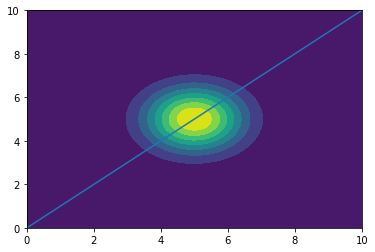

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

cov = np.array([[1,0],[0,1]])
X = np.linspace(0,10,num=5000)
X_1 = np.repeat(X,len(X))
X_2 = np.tile(X,len(X))
X_all = np.vstack((X_1,X_2)).T
z = multivariate_normal.pdf(X_all,[5,5],cov)
z = z.reshape(len(X),len(X))
h = plt.contourf(X,X,z)
plt.plot(X,X)
plt.show()

for example consider trying to fit an entire covariance to this line , it might become a singular matrix since the variance in direction perpendicular to line is zero , bu , if we restrict the covariance to be axis aligned , we wont allow the covariance to go at a 45 degree angle and so this scenario is prevented

<h1>Math</h1>

we want to consider the similarities between kmeans and GMMs

Kmeans :

calculate Responsibilities:

$$r(i,k) = \frac{\exp(-\beta {\Vert x_i - m_k \Vert}^2)}{\sum\limits^{K}_{j=1} \exp(-\beta {\Vert x_i - m_k \Vert}^2)}$$

Reestimate Parameters:

$$m_k = \frac{\sum\limits^{N}_{i=1} r(i,k) x_i}{\sum\limits^{N}_{i=1} r(i,k)}$$

GMM :

calculate Responsibilities:

$$\gamma(i,k) = \frac{\pi_k {\left({(2\pi)}^D \vert \Sigma_k \vert \right)}^{1/2}  \exp \left( -\frac{1}{2} {(x_i - \mu_k)}^T \Sigma_k^{-1} (x_i - \mu_k) \right) }{ \sum\limits^{K}_{j=1}\pi_j {\left({(2\pi)}^D \vert \Sigma_j \vert \right)}^{1/2}  \exp \left( -\frac{1}{2} {(x_i - \mu_j)}^T \Sigma_j^{-1} (x_i - \mu_j) \right)}$$

Reestimate Parameters:

$$\mu_k = \frac{1}{N_k} \sum^{N}_{i=1} \gamma(i,k)x_i$$

$$\Sigma_k = \frac{1}{N_k} \sum^{N}_{i=1} \gamma(i,k)(x_i - \mu_k){(x_i - \mu_k)}^T$$

$$\pi_k = \frac{N_k}{N} , where N_k = \sum^{N}_{i=1} \gamma(i,k)$$


so both follow the same steps , but in case of GMMs we have more parameters

lets look more closely at the responsibilities 

in both cases , $r(i,k_) and \gamma(i,k)$ represent how much point i belongs to cluster k

But their are differences ,first we notice that in kmeans , there is no coeffecient beside the exponential , meaning there is no $p_i$ , this means that there is no prior over the latent variable z , this could be interpreted that , before seeing any point x , we beleive that all classes are equally probable , also this could be explained as having a uniform distributed prior

now lets look inside the exponential , we see that both kmeans and gmms depend on the euclidean distance , but where GMMs depend on the covariance , Kmeans depend on a constant $\beta$ , this means that in kmeans we assume that covariance is the same for all clusters and constant in all directions , recall that when covariance is a constant ($\beta$) this means spherical covariance


Now lets look more closely at parameter update

both have the same update for $\mu$ , now since $\pi_k$ is constant and  uniform and $\Sigma_k$ is spherical and constant  , these 2 parameters dont need to be updated , this means that kmeans is exactly GMM with 2 restrictions:

1) Spherical tied covariance

2) constant prior






<h1>Math</h1>

Now we will discuss Kernel Density Estimation which is a general method of estimating the distribution of a dataset , so we collect some samples and we would like to know the distribution they came from


in the general case the kernel density estimate :


$$f(x) = \frac{1}{N} \sum^{N}_{i=1}\varphi_h (x - x_i)$$

is the weighted sum of kernel functions where each of the weights is $\frac{1}{N}$


here is an example of a KDA :

<img src="extras/16.2.PNG" width=500 ></img>


possible choice of $\varphi$ are uniform,triangular and Gaussian

here is an exaple of different kernels :

<img src="extras/16.3.PNG" width=500></img>

but what is this subscript h with $\phi$

h is called the bandwidth , its how much we stretch or squash $\varphi$ , since a proper density function must integrate to 1 , we must scale it back by same amount outside $\phi$ so another way of writing Kernel density Estimator

$$f(x) = \frac{1}{N} \sum^N_{i=1} \frac{1}{h} \varphi \left( \frac{x-x_i}{h}\right)$$

in D dimensions , $f(x) = \sum\limits^{N}_{i=1} \frac{1}{h^D} \varphi \left( \frac{x - x_i}{h}\right)$


here is an example of kernels with different banwidths :

<img src="extras/16.1.PNG" width = 500 ></img>

lets see how this might work if our kernel was a gaussian


$$f(x) = \frac{1}{N} \sum^N_{i=1} \frac{1}{h} \varphi \left( \frac{x - x_i}{h}\right)$$

first we begin with a gaussian with mean 0 and variance 1

$$\varphi(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2} x^2} , N(0,1)$$

now lets plug in $\left( \frac{x-x_i}{h}\right)$ and divide by h outside , then we yeild

$$\frac{1}{h} \varphi \left( \frac{x-x_i}{h}\right) = \frac{1}{\sqrt{2\pi h}} e^{-\frac{1}{2} \left( {\frac{x - x_i}{h}}\right)^2 } , N(x_i,h^2)$$

let compare this by the general formula for the gaussian

$$\frac{1}{\sqrt{2\pi \sigma}} e^{-\frac{1}{2} \left( {\frac{x - \mu}{\sigma}}\right)^2 } , N(\mu,\sigma^2)$$


The above shows that after plugging in $\left( \frac{x-x_i}{h}\right)$ and dividing by h outside , we still yeild a valid gaussian with mean $x_i$ and variance $h^2$


we have seen how the bandwidth hyper parameter affects the variance causing kernels to become fatter or skinnier

if we choose a high bandwidth , hence fat kernels , our final density becomes very smooth , if we choose low bandwidth , hence skinny kernels , our final density becomes very jaggy , to get convinced imagine the extreme case where we choose bandwidth = 0 , and then all the gaussians end up being spikes

<img src="extras/16.4.PNG" width = 500 ></img>

The figure above show the effects of different bandwidths on KDE

so it seems that the KDE is like the GMM but with some differences :

1) Muxture proportions are fixed to $\frac{1}{N}$

2) if we have N points ,  in KDE we use N gaussinas(kernels) , in clustering we usually choose K << N , where K is the number of clusters , so in clustering we use K gaussians , this is to be expected since in KDE dont know the shape of the distribution , maybe its a guassian maybe not , maybe it doesnot even look like a mixture of gaussin and so we wouldnot want a typical GMM that may not fit to data 

3) Since we have N gaussians , there is no need to calculate mean of gaussian , the mean of the ith kernel is the ith data point itself (look again at the equation up you will see that the mean is $x_i$)

4) recall that in full GMMs (GMMs with full covariance) we had the problem of getiing a singular matrix , this doesnot occur in KDE since it imposes the restriction of fixed spherical covariance , so no need for covariance here

5) This means that we have 0 parameters to learn !!! we know the mixed proportions , $\frac{1}{N}$ , we know the means , those are the datapoints $x_i$, and we know the covariance , thats just the bandwidth h (just a fixed number since we imposed a tied-spherical covariance restriction ) , h becomes a hyper parameter and we avoided the singular covariance by fixing the variace 

Now how do we choose h ?

Hyperparameters are called such in order to differentiate them from regular parameters that are learned by algorithm

one way to choose h is to leave it for the user to observe the kernel density estimate and decide whether its too smooth or not smooth enough

another way is using corss-validation (discussed in 12-Practical Machine Learning) , the score here can be the log likelihood of the validation data under the fitted density , after we get k validation scores we can get mean and variance to get and idea about how good is our setting of h



<h1>Math</h1>

Now we compare GMMs to Bayes Classifier

first lets revise the Bayes calssifier :

first we have our dataset ,

$$Dataset \ = \ \{(x_1,y_1),(x_2,y_2),....,(x_N,y_N) \}$$

$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} = \frac{p(x|y)p(y)}{\sum\limits_yp(x|y)p(y)}$$

we call $p(y|x)$ the posterior , $p(x|y)$ the generative distribution , since we can sample from it to generate new samples , $p(x)$ the evidence , which is the joint distribution of x and y summed over all possible values of y , just a constant so we can get valid probabilities that sum up to 1

GMM :

$$p(z=k|x) = \frac{p(x|z=k)p(z=k)}{p(x)}$$

Bayes Classifier :

$$p(y=k|x) = \frac{p(x|y=k)p(y=k)}{p(x)}$$


It should be clear that clustering is unsupervised learning is the same as classification in supervised learning since both use the posterior to 'categorise' a data point , we can say that clustering is another word for categorisation when we are told nothing about how to categorise data (no labels) , and classification is also another word for categorisation when we are told how to categorise data (labels)

This explains why we have z for unsupervised learning and y for supervised learning , we call z a hidden variable , since unlike supervised learning where we have labels , we never get to observe z

lets extend this comparison firther , if we take the generative distribution in Bayes classifier to be a multivariate gaussian we yeild :

$$p(y=k|x) = \frac{\pi_k N(x;\mu_k,\Sigma_k)}{\sum\limits^K_{j=1} \pi_j N(x;\mu_j,\Sigma_j)}$$

which looks exaclty like a GMM

Then what is the difference ?

The major difference is how we train the model , in unsupervised learning we are left to guess unlike in supervised learning where we have the labels

lets see how we would find the parameters for the Bayes classifier :

first suppose we want to find $\pi = p(y=k)$ , an example would be x = blood test for virus , then $pi$ the probability some person having a virus without any information about that person at all is clearly the proportion of people in the population who have the virus , so :

$$ \pi_k = p(y=k) = \frac{\# \ of \ samples \ in \ class \  k}{N} $$

if we want to write this more mathematically :

$$ \pi_k =  \frac{\sum\limits^N_{i=1} 1(y_i=k)}{N} $$

the one/indicator function , which appears in term $1(y_i=k)$ , is defined as follows :

$$1(true) = 1 , 1(false) = 0$$

Then , since we have K classes we want to calculate K $\mu$'s and K$\Sigma$'s , thats a set for each class

so for each class k , $\mu_k$ is the mean of s's that belong to class k

$$\mu_k = \frac{1}{\sum\limits^N_{i=1} 1(y_i=k)} \sum\limits^N_{i=1} 1(y_i = k) x_i$$

as we saw before $\sum\limits^N_{i=1} 1(y_i=k)$ gives us the number of samples that belong to class k , for $\sum\limits^N_{i=1} 1(y_i = k) x_i $ , if $x_i$ doesnot belong to k , $1(y_i = k)$ is zero and this point doesnot contribute to the calculation of $mu_k$ , if $x_i$ is in k , then $1(y_i = k)$ is 1 and this points contributes to the calculation of $\mu_k$

for each class k we also want to calculate $\Sigma_k$ which is the sample covarinace of x's that belong to class k

$$\Sigma_k = \frac{1}{\sum\limits^N_{i=1} 1(y_i=k)} \sum\limits^N_{i=1} 1(y_i = k)(x_i - \mu_k){(x_i - \mu_k)}^T $$

of course in code we dont actually sum over all points since there might be lots of points ,we can just select all points that belong to class k then make the calculations on them

now lets do a side by side cpmparion

    GMM                                               Bayes Classifier
$ \ \  \pi_k =  \frac{N_k}{N}  \ \ \ \  \ \ \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \  \ \ \ \ \ \ \ \ \ \ \ \  \ \ \  \pi_k =  \frac{N_k}{N} $ 


$\mu_k = \frac{1}{N_k} \sum\limits^N_{i=1} \gamma(i,k) x_i \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \    \mu_k = \frac{1}{N_k} \sum\limits^N_{i=1} 1(y_i = k) x_i$  
    

$\Sigma_k = \frac{1}{N_k} \sum\limits^N_{i=1} \gamma(i,k)(x_i - \mu_k){(x_i - \mu_k)}^T \ \ \  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \Sigma_k = \frac{1}{N_k} \sum\limits^N_{i=1} 1(y_i = k)(x_i - \mu_k){(x_i - \mu_k)}^T $


$where \ N_k = \sum\limits^N_{i=1} \gamma(i,k) \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \ where \  N_k = \sum\limits^N_{i=1} 1(y_i=k)$

It should be clear now that both are exactly the sam , the only difference is that in the unsupervised case we have $\gamma$ while in the supervised case we have $1$

This is to be expected , $\gamma$ is the probability of a datapoint i belonging to class k , in the supervised case this probability becomes either 0 or 1 since we have labels , and thus we dont need to guess 

so we can view the unsupervised case as a generalisation of the supervised case where the category assignements are probabilistic rather than determinisitc , this , once again , occurs because we dont have the labels and so we need to guess what they might be

<h1>Math</h1>

Now wewant to know where these equations came from , we will see that , as expected , its  just a matter of maximising the likelihood

However , the likelihood for the Bayes calssifier is different from that of a GMM ,  we will see how knowing the labels will affect our likelihood

$$ \pi_k =  \frac{N_k}{N} $$ 


$$ \mu_k = \frac{1}{N_k} \sum\limits^N_{i=1} 1(y_i = k) x_i $$  
    

$$ \Sigma_k = \frac{1}{N_k} \sum\limits^N_{i=1} 1(y_i = k)(x_i - \mu_k){(x_i - \mu_k)}^T $$


$$ where \  N_k = \sum\limits^N_{i=1} 1(y_i=k) $$

Now we want to see the formula for the likelihood :

$$  L = \prod^N_{i=1} \prod^K_{k=1} {\left[ \pi_k N \left( x_i ;\mu_k,\Sigma_k \right) \right]}^{1(y_i=k)} $$

notice how a power of the indicator function , $1(y_i=k)$ implies a categorical distribution

we will see an example now :

Assume we have K possibilities , outcomes (1...K)

for a categorical distribution we have K parameters :

$$ \theta_k = p(x=k) , k = 1...K \large$$

then the full pmf can be written as :

$$  p(x) = \prod^K_{k=1} \theta_k^{1(x=k)} = \theta_1^{1(x=1)} \theta_2^{1(x=2)}...\theta_2^{1(x=K)} \large $$

lets confirm that this works :

$$  p(x=3) =  \theta_1^0 \ \theta_2^0 \ \theta_3^1 ... \ \theta_K^0 = \theta_3$$ 

obviously it wokrs , now lets take the log likelihood

$$  L = \prod^N_{i=1} \prod^K_{k=1} {\left[ \pi_k N \left( x_i ;\mu_k,\Sigma_k \right) \right]}^{1(y_i=k)} $$


$$ l = \sum^{N}_{i=1} \sum^{K}_{k=1} 1(y_i = k) \left[ \log \pi_k + log N(x_i;\mu_k,\Sigma_k )\right] $$

$$ l = \sum^N_{i=1} \sum^K_{k=1} 1(y_i = k) \left[ \log \pi_k - \frac{1}{2} \log \left( (2\pi)^D \vert \Sigma_k \vert \right) - \frac{1}{2} {(x_i - \mu_k)}^T \Sigma_k^{-1} (x_i - \mu_k) \right] \$$


Now , as usual , we will take the derivatives and set them to 0 , since our parameters are now vectors and matricies , we will need some aid from 'The Matrix Cookbook' , (google search its usually the first result)

First lets try to take derivative wrt  $\mu$:

First we can croos-out terms that are constants wrt $\mu$

$$ l = \sum^{N}_{i=1} \sum^{K}_{k=1} 1(y_i = k) \left[ \require{cancel}\cancel{\log \pi_k} - \require{cancel}\cancel{\frac{1}{2} log \left( {(2\pi)}^D \vert \Sigma _k\vert\right)} -\frac{1}{2}{(x_i - \mu_k)}^T \Sigma^{-1}_k (x_i - \mu_k)                          \right]$$

then we get :

$$\frac{\partial l}{\partial \mu_k} = \sum^N_{i=1} 1(y_i = k) \left[ -\frac{1}{2} \frac{\partial}{\partial \mu_k} (x_i - \mu_k) \Sigma_k^{-1} (x_i-\mu_k)\right]$$

Now we expand the term that contains $\mu$

$$\frac{\partial l}{\partial \mu_k} = \sum^{N}_{i=1} 1(y_i = k) \left[ -\frac{1}{2}  \frac{\partial}{\partial \mu_k} \left( x_i^T \Sigma_k^{-1} x_i - 2x_i\Sigma_k^{-1}\mu_k + \mu_k^T \Sigma_k^{-1} \mu_k \right) \right]$$

now we see that only 2 terms contain $\mu$ a linear term and a quadratic term , these are what we need to look for in matrix cookbook , the rules used are (69) and (81) , bare in mind that the inverse of a a symmetric matrix is also symmetric , so the inverse of ccovariance matrix , also called the precision matrix is also symmetric (so $(\Sigma^{-1} )^T = (\Sigma^{-1} )$  ) , also each $x_i$ is a vector so $x_i^T = x_i$ 

so after taking the derivative the fnal result is :

$$\frac{\partial l}{\partial \mu_k} = \sum^{N}_{i=1}  1(y_i = k) \left( -\frac{1}{2} \right) \left( -2\Sigma_k^{-1}x_i + 2\Sigma_k^{-1} \mu_k \right)$$

note : we could have also used $\frac{x^TBx}{\partial x} = \left( B + B^T\right)x$ , then with the knowledge that the inverse of a symmetric matrix is also symmetric we could reach the same result

now lets set the derivative to 0 and solve for $\mu$


$$ \sum^{N}_{i=1}(y_i = k) \left( -\frac{1}{2} \right) \left( -2\Sigma_k^{-1}x_i + 2\Sigma_k^{-1} \mu_k \right) = 0$$

from this we can get the expected result :

$$\mu_k = \frac{1}{\sum\limits^N_{i=1} 1(y_i = k)} \sum^N_{i=1} 1(y_i = k) x_i $$

now lets take the derivative wrt $\Sigma$

first we corss out tems that are constant wrt $\Sigma$

$$l = \sum^{N}_{i=1} \sum^{K}_{k=1} 1(y_i = k) \left[ \require{cancel} \cancel{\log \pi_k} - \frac{1}{2} \log \left( \require{cancel} \cancel{{(2\pi)}^D}  \vert \Sigma_k \vert \right) - \frac{1}{2} (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k) \right]$$

notice that $\log \left({(2\pi)}^D \vert \Sigma_k \vert \right)$ is  = $\log {(2\pi)}^D + \log \vert \Sigma_k \vert$ then we can cross the term which has no $\Sigma$ , $\require{cancel} \cancel{\log {(2\pi)}^D} + \log \vert \Sigma_k \vert$

after crossing out unecessary terms we take derivative :

$$\frac{\partial l}{\partial \Sigma_k } = \sum^{N}_{i=1} \sum^{K}_{k=1} 1(y_i = k) \left( - \frac{1}{2} \right) \frac{\partial}{\partial \Sigma_k } \left[ \log \vert \Sigma_k \vert \ + (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k) \right]$$

now we go the matrix cookbook to get derivatives , we will find (57) to be $\frac{\partial \vert \ ln \ det(X)\vert}{\partial X} = (X^T)^{-1}$ this follows that $\frac{\partial \vert \ ln \  det(\Sigma_k)\vert}{\partial X} = (\Sigma_k^T)^{-1}$ , since $\Sigma$ is a symmetric matrix thats the same as $\Sigma_k^{-1}$ , for the other term we use (61) in matrix cookbook

so after taking the derivative wrt $\Sigma$ we get : 

$$\frac{\partial l}{\partial \Sigma_k} = \sum^N_{i=1} 1(y_i = k)\left( - \frac{1}{2} \right) \left( \Sigma_k^{-1} - \Sigma_k^{-1}{(x_i - \mu_k)(x_i - \mu_k)}^T \Sigma_k^{-1} \right)$$

now we set derivative for 0 and solve for $\Sigma$

$$\sum^N_{i=1} 1(y_i = k)\left( - \frac{1}{2} \right) \left( \Sigma_k^{-1} - \Sigma_k^{-1}{(x_i - \mu_k)(x_i - \mu_k)}^T \Sigma_k^{-1} \right) = 0$$

This may not be as obvious as when we calculated $\mu$ so lets take it step by step

first we drop the $-\frac{1}{2}$ and we expand the summation , doing so we yeild :

$$\sum^N_{i=1} 1(y_i = k)  \Sigma_k^{-1} - 1(y_i = k) \Sigma_k^{-1}{(x_i - \mu_k)(x_i - \mu_k)}^T \Sigma_k^{-1}  = 0$$

next we move the -ve term to other direction : 

$$\sum^N_{i=1} 1(y_i = k)  \Sigma_k^{-1} = 1(y_i = k) \Sigma_k^{-1}{(x_i - \mu_k)(x_i - \mu_k)}^T \Sigma_k^{-1}  $$

now , we want $\Sigma_k$ not $\Sigma^{-1}_k$ , what we can do is multiply both sides of the equation by $\Sigma_k$ on the right , the  $\Sigma^{-1}_k$ on the left disappears and we are left with one  $\Sigma^{-1}_k$ on the right

so :

$$ \left[ \sum^N_{i=1} 1(y_i = k)  \Sigma_k^{-1} = 1(y_i = k) \Sigma_k^{-1}{(x_i - \mu_k)(x_i - \mu_k)}^T \Sigma_k^{-1} \right] \Sigma_k $$

then we get :

$$\sum^N_{i=1} 1(y_i = k) = 1(y_i = k) \Sigma_k^{-1}{(x_i - \mu_k)(x_i - \mu_k)}^T   $$

now we do the same ,but we multiply everything by $\Sigma_k$ on the left , the $\Sigma^{-1}_k$ on the right side disappears and $\Sigma_k$ appears on the left side

so :

$$ \Sigma_k \left[ \sum^N_{i=1} 1(y_i = k)  \Sigma_k^{-1} = 1(y_i = k) \Sigma_k^{-1}{(x_i - \mu_k)(x_i - \mu_k)}^T \Sigma_k^{-1} \right]  $$

then we get:

$$\Sigma_k \sum^{N}_{i=1} 1(y_i = k) = \sum^N_{i=1} 1(y_i = k)(x_i - \mu_k){(x_i - \mu_k)}^T$$

the final step is to move the summation on the left side to the denominator on the right side

$$\Sigma_k = \frac{1}{\sum\limits^{N}_{i=1} 1(y_i = k) } \sum^N_{i=1} 1(y_i = k)(x_i - \mu_k){(x_i - \mu_k)}^T$$


finally we want to solve for $\pi$

first lets take the derivative , again terms which are constant wrt to $\pi$ gets cancelled out

$$l = \sum^N_{i=1} \sum^K_{k=1} 1(y_i = k) \left[ \log \pi_k - \require{cancel} \cancel{\frac{1}{2} \log \left( {2\pi}^D \vert \Sigma_k \vert \right)} - \require{cancel} \cancel{\frac{1}{2} {x_i - \mu_k}^T \Sigma_k^{-1} {(x_i - \mu_k)}} \right]$$


this then may appear easy , but its not , remember that we have a constrain that all elements of $\pi$ need to sum up to one , the way to deal with this is Lagrange multipliers , first after cancelling out terms which are constant wrt $\pi$ we yeild :

$$l' = \sum^N_{i=1} \sum^K_{k=1} 1(y_i = k) \log \pi_k , subject \ to \ \sum^K_{k=1} \pi_k = 1$$

now $l'$ is the thing we want to optimise , now lets define our lagrangian , we denote it by $R$ , the lagrange multiplier is denoted by $\lambda$

$$R = l' - \lambda \left( 1 - \sum^K_{k=1} \pi_k \right)$$

next step is to take derivative of Lagrangian wrt to our parameters then set it to 0 and solve for our parameters , note that if we take derivative wrt $\lambda$ and set it to 0 , we go back to the original constraint , so we focus now on taking derivative wrt $\pi$

$$\frac{\partial R}{\partial \pi_k} =  \sum^N_{i=1} 1(y_i = k) \frac{1}{\pi_k} + \lambda $$

now set this to 0 and solve for $\pi_k$

$$\sum^N_{i=1} 1(y_i = k) \frac{1}{\pi_k} + \lambda = 0 \leftrightarrow \pi_k = - \frac{1}{\lambda} \sum^N_{i=1} 1(y_i = k)$$

now we already know that we should have $\frac{1}{N}$ as our coeffecient so lets see if we can arrive at that answer 

in order to solve for $\lambda$ all we have to do is plug in our expression for $\pi_k$ back into our original constraint

$$1 = \sum^K_{i=1} \pi_k$$

$$1 = \sum^K_{k=1} \frac{-1}{\lambda} \sum^N_{i=1} 1(y_i = k)$$

$$- \lambda = \sum^N_{i=1} \sum^K_{k=1} 1(y_i = k)$$

the trick here is to recognise that $\sum\limits^K_{k=1} 1(y_i = k)$ is equal to 1 since $y_i$ can hold only one value of k , from this we can reach that $- \lambda = N$ , then we plug it back to expression for $\pi_k$ to get our expected result

$$ \pi_k = -\frac{1}{\lambda} \sum^{N}_{i=1} 1(y_i = k) = \frac{1}{N} \sum^N_{i=1} 1(y_i = k) $$

<h1>Math</h1>

Finally we want to take a closer look at the Expectation-Maximisation algorithm , we want to understand wehre the GMM training algorithm comes from and how it is rooted in probability

we will split this into two parts , first deriving EM in general (EM can be applied to many different models ) , the second is applying EM to GMMs

we start with one of the results of convex analysis which is Jenssen's Inequality :

it says that if f is :

$$convex : E[f(X)] \ge f(E[X])$$

$$concave : E[f(X)] \le f(E[X])$$


<img src='extras/16.5.PNG' width = 500></img>

in words , "A function of a single variable is concave if every line segment joining two points on its graph does not lie above the graph at any point. Symmetrically, a function of a single variable is convex if every line segment joining two points on its graph does not lie below the graph at any point.


okay but is there some way to get an intuitive feel of why this may be true and to make it easier to remember it ?

recall the variance :

$$ var(X) = E(X^2) - \left[ E(X) \right]^2 \ge 0$$

we know that the variance of a random variable $var(X)$ is equal to $ var(X) = E(X^2) - \left[ E(X) \right]^2 $ and is always non negative hence $\ge 0$

from the above we can reach that

$$ E(X^2) \ge \left[ E(X) \right]^2  $$

now $f(X) = X^2 \ is \ convex $ ,so $E(X^2)$ is basically $E(f(X))$ and $\left[ E(X) \right]^2$ is the same as $f(E(X))$ , so the above equation can be re-written as :

$$E[f(X)] \ge f(E[X])$$

which is that of a convex function , this is a demonstration that Jenssen's Inequality holds

Another way to remmebr it is as follows :

<img src="extras/16.6.PNG" width = 500></img>

Clearly this is a convex function , since a line drawn between any 2 points always liets above the curve

Now consider 2 points , a and b , assume that a random variabke X can only rake the values a or b with equal probabilities , so $E[X]$ is just in between a and b 

we can also find f(a) and f(b) which are the corresponding points on the convex function , if we take the $E[f(x)]$ that falls between f(a) and f(b)

but if we take $f(E[X])$ this falls on the curve it self and therefore $E[f(X)] > f(E[X])$

Now when does this INEQUALITY turn into and EQUALITY :

that happens when

$$E[f(X)] = f(E[X])$$

this happens when :

$$X = E[X] , \ i.e. \ X \ is \ constant$$

Now lets go back to maximim likelihood :

recall that we want to maximise the log-likelihood

$$l(\theta) = \sum^N_{i=1} logp(x_i;\theta)\$$

Here $\theta$ represents a set of generic parameters , we will se later thy explicitly writing $\theta$ is useful

recall that our model is a latent variable model , so for each $x_i$ there is also a hidden variable $z_i$ , we can consider $x_i$ and $z_i$ to be the full dataset and we can write the joint distribution


$$l(\theta) = \sum^N_{i=1} \log \sum_{z_i} p(x_i,z_i;\theta)$$

remember that p(x) is what we get when we marganalise over z , we wont write any specific values of z since in general they can take on any values (in fact if it were contineous it would be an integral )

Now lets discuss our strategy to  solve the problem , this is the critical part of EM and everything else follows from this , we should be able to build a good intuition of the EM using the following picture :

<img src='extras/16.7.PNG' width=500><img>

what we will do is as follows

Given some log likelihood function , repeatidly construct a lower bound on that function

note that the log-likelihood of the latent variable model is not concave but our lower model is concave , the trick is that we took something that we could NOT optimise (remember how the log likelihood of mixture of gaussians was not even differentiable) and made something that we can optimise (that is our concave lower bound , we will see later how this help)

one we construct that lower bound , we will optimise it , taht is find the maximum point of the lower bound , as seen in the picture this also improves the log likelihood

after we arrive at this new point , we repeat , we reconstruct a lower bound , maximise parameters wrt new lower which gives us a new set of parameters and so on , as we can see by repeating this we can reach a local maximum

the act of finding the lower bound is called the E-step , and the act of optimising the lower bound is called the M-step

now we will begin by introducing some arbitary distribution over z , so

$$Q_i(z_i) \ge 0 , \sum_{z_i}Q_i(z_i) = 1$$

Now lets try to introduce Q into Log-likelihood

first we begin by our original expression for log-likelihood , this is the same as the defined above :

$$ l(\theta) = \sum^N_{i=1} \log \sum_{z_i} p(x_i,z_i;\theta) $$

next we multiply both top and bottom by $Q_i(z_i)$

$$= \sum^N_{i=1} \log \sum_{z_i} Q_i(z_i) \frac{p(x_i,z_i;\theta)}{Q_i(z_i)}$$

now this is the tricky part where we apply jensen's inequality

$$\ge \sum^N_{i=1} \sum_{z_i} Q_i(z_i) \log \frac{p(x_i,z_i;\theta)}{Q_i(z_i)}$$

lets see how we arrived at this

first recall the formula for the expected value :

$$E(X) = \sum_i x_i p_(x_i)$$

now  consider :

$$\sum_{z_i} Q_i(z_i)  \frac{p(x_i,z_i;\theta)}{Q_i(z_i)}$$

if we take $x_i$ to be $\frac{p(x_i,z_i;\theta)}{Q_i(z_i)}$ and $p(x_i)$ to be $Q_i(z_i)$ , then we are actually taking the expected value wrt the distribution $Q_i$ so we now recognise that the inner summation as an expected value

$$\sum_{z_i} Q_i(z_i)  \frac{p(x_i,z_i;\theta)}{Q_i(z_i)} = E_{z_i \sim Q_i }  \left[ \frac{p(x_i,z_i;\theta)}{Q_i(z_i)} \right] $$

so we can rewrite :

$$\sum^N_{i=1} \log \sum_{z_i} Q_i(z_i) \frac{p(x_i,z_i;\theta)}{Q_i(z_i)}$$

as :

$$\sum^N_{i=1} \log E_{z_i \sim Q_i }  \left[ \frac{p(x_i,z_i;\theta)}{Q_i(z_i)} \right]$$


now we know that log is a concave function !!!

see where this is going , since $f(x)  = \log X$ is concave , we know that $f(E[X]) \ge E[f(X)] , this means that$ 


$$\sum^N_{i=1} \log E_{z_i \sim Q_i }  \left[ \frac{p(x_i,z_i;\theta)}{Q_i(z_i)} \right] \ge \sum^N_{i=1} E_{z_i \sim Q_i }  \left[ \log  \frac{p(x_i,z_i;\theta)}{Q_i(z_i)} \right]$$

now , lets return it back , replacing the Expectation by the inner sum , we yeild :

$$\sum^N_{i=1} \log \sum_{z_i} Q_i(z_i) \frac{p(x_i,z_i;\theta)}{Q_i(z_i)}
\ge \sum^N_{i=1} \sum_{z_i} Q_i(z_i) \log \frac{p(x_i,z_i;\theta)}{Q_i(z_i)}$$

ok , but what is Q ?

The inequality holds for any Q (since all we did was some algebraic manipulation)

yet , remembering our picture , we want a tight lower bound , one that exactly touches the log likelihood at our current set of parameters ($\theta$)

Another way of saying this we want jensin's inequality to have equality , since we want our likelihood $\sum^N_{i=1} \log \sum_{z_i} Q_i(z_i) \frac{p(x_i,z_i;\theta)}{Q_i(z_i)}$ to equal(touch) our lower bound $\sum^N_{i=1} \sum_{z_i} Q_i(z_i) \log \frac{p(x_i,z_i;\theta)}{Q_i(z_i)}$ at $\theta = current \ setting \ of \ theta $

How do we obtain equality ? well as mentioned above  ,  we need the thing inside the expected value to be constant , so that the expected value of it is also a constant , this would cause us to arrive at $X = E[X] $ which is the condition for equality


$$\sum_{z_i} Q_i(z_i)  \frac{p(x_i,z_i;\theta)}{Q_i(z_i)} = E_{z_i \sim Q_i }  \left[ \frac{p(x_i,z_i;\theta)}{Q_i(z_i)} \right] $$

so we want :

$$\frac{p(x_i,z_i;\theta)}{Q_i(z_i)} = c$$

where c is a constant 

from this we can get :

$$Q_i(z_i) = cp(x_i,z_i;\theta)$$

since we know that $Q_i(z_i)$ is a valid probability distribution , we can solve for this constant c

$$\sum_{z_i} Q_i(z_i) = c \sum_{z_i}p(x_i,z_i;\theta) = c \  p(x_i;\theta) = 1$$

This follows that:

$$c = \frac{1}{p(x_i;\theta)}$$

now lets plug this back into $Q_i(z_i) = cp(x_i,z_i;\theta)$ now we get :

$$ Q_i(z_i) = \frac{p(x_i,z_i;\theta)}{p(x_i;\theta)} = p(z_i \vert x_i; \theta)$$

This means that $Q_i(z_i)$ is just the posterior $p(z_i \vert x_i; \theta)$ using the rule of conditional probability , we also know this as $\gamma$

This is the E-step , we want to find $p(z_i \vert x_i; \theta)$ which is  = $Q_i(z_i)$ which is equal to $\gamma$ for data point i , obviously we do this for all datapoint i

Now we want to complete the Mstep , that is maximise the lower bound that we found wrt $\theta$

$$\theta = arg \ \max \limits_{\theta} \sum^N_{i=1} \sum_{z_i} Q_i(z_i) \log \frac{p(x_i,z_i;\theta)}{Q_i(z_i)}$$

note how we continue to write $Q_i(z_i)$ since this will be a fixed values using the old values of $\theta$ , we want to maximise this expression wrt $\theta$ , but $\theta$ is only variable in the joint distribution 

remember how originally we started with $l(\theta) = \sum\limits^N_{i=1} log \sum_{z_i} p(x_i,z_i;\theta)$ , so the only term that had $\theta$ as a variable was $p(x_i,z_i;\theta)$


another way of writing this is to give time indicies to $\theta$ , so $Q_i(z_i)$ uses $\theta$ at time $t$ but in the joint distribution we are optimising at time $t+1$

$$\theta^{(t+1)} = arg \ \max_{\theta^{(t+1)}} = \sum^N_{i=1} \sum_{z_i} p(z_i \vert x_i;\theta^{(t)}) log \frac{p(x_i,z_i;\theta^{(t+1)})}{p(x_i,z_i;\theta^{(t)})} $$

so the variable is $\theta^{(t+1)}$ and $\theta^{(t)}$ is fixed its the old value at the previous time step

to end this section we want to ask why does EM converge ?

we will sohw that EM lead to monotonic improvement in objective

in other words the EM always converges at least to a local maximum

so we want to show that :

$$l(\theta^{(t+1)}) \ge l(\theta^{(t)})$$

we start by indexing $Q_i$ with time (t) which denotes the iteration number

$$Q_i^{(t)}(z_i) = p(z_i | x_i ; \theta^{(t)})$$

since we chose $Q_i$ to be this specific distribution , jenssen's inequality holds with equality , so we can say that 

$$l(\theta^{(t)}) = \sum^N_{i=1} \sum_{z_i} Q_i^{(t)} (z_i) \log \frac{p(x_i,z_i;\theta^{(t)})}{Q_i^{(t)}(z_i)}$$

BUT , in the M-step recall how we found $\theta^{(t+1)}$ , we did so by maximising 

$$\sum\limits^N_{i=1} \sum\limits_{z_i} p(z_i \vert x_i ; \theta^{(t)}) \log \frac{p(x_i,z_i;\theta^{(t+1)})}{p(z_i | x_i ; \theta^{(t)})}$$

wrt to $\theta^{(t+1)}$ , but since this expression still has $\theta^{(t)}$ in the Q-distributions , then this expression is a lower bound for $l(\theta^{(t+1)})$ , its not  equal since we have a mixture of $\theta$s at different times



$$l(\theta^{(t+1)}) \ge \sum^N_{i=1} \sum_{z_i} p(z_i \vert x_i ; \theta^{(t)}) \log \frac{p(x_i,z_i;\theta^{(t+1)})}{p(z_i \vert x_i ; \theta^{(t)})} $$

one again , remember that we have shown before that for jenssen's inequality to be an equality we need $Q_i^{(t+1)}(z_i) = p(z_i | x_i ; \theta^{(t+1)})$ , but now that we have $Q_i^{(t+1)}(z_i) = p(z_i | x_i ; \theta^{(t)})$ which is a different ,  so the inequality holds and and the expression $\sum\limits^N_{i=1} \sum_{z_i} p(z_i \vert x_i ; \theta^{(t)}) \log \frac{p(x_i,z_i;\theta^{(t+1)})}{p(z_i \vert x_i ; \theta^{(t)})} $  becomes a lower bound for $l(\theta^{(t+1)})$

yet , $\sum\limits^N_{i=1} \sum_{z_i} p(z_i \vert x_i ; \theta^{(t)}) \log \frac{p(x_i,z_i;\theta^{(t+1)})}{p(z_i \vert x_i ; \theta^{(t)})} $  is still :

$$ \ge \sum^N_{i=1} \sum_{z_i} p(z_i \vert x_i ; \theta^{(t)}) \log \frac{p(x_i,z_i;\theta^{(t)})}{p(z_i \vert x_i ; \theta^{(t)})} = l(\theta^{(t)})$$

since $\theta^{(t+1)}$ was the $\theta$ used to maximise $\sum\limits^N_{i=1} \sum_{z_i} p(z_i \vert x_i ; \theta^{(t)}) \log \frac{p(x_i,z_i;\theta^{(t)})}{p(z_i \vert x_i ; \theta^{(t)})}$ surely $\sum\limits^N_{i=1} \sum_{z_i} p(z_i \vert x_i ; \theta^{(t)}) \log \frac{p(x_i,z_i;\theta^{(t+1)})}{p(z_i \vert x_i ; \theta^{(t)})} $ has a greater than or equal value since no other $\theta$ can yeild a higher value  

so we have shown that

$$l(\theta^{(t+1)}) \ge \sum^N_{i=1} \sum_{z_i} p(z_i \vert x_i \theta^{(t)}) \log \frac{p(x_i,z_i;\theta^{(t+1)})}{p(z_i \vert x_i ; \theta^{(t)})} $$

$$\ge \sum^N_{i=1} \sum_{z_i} p(z_i \vert  x_i ; \theta^{(t)}) \log \frac{p(x_i,z_i;\theta^{(t)})}{p(z_i \vert x_i ; \theta^{(t)})} = l(\theta^{t})$$

and thus we have show that $l(\theta^{(t+1)}) \ge l(\theta^{(t)})$

<h1>Math</h1>

Now that we have derived EM , lets see how we can apply it to solve for weights in a GMM

first we begin with the E-step:

we want to find $Q_i(z_i = k)$ which is just the posterior $p(z_i|x_i)$ , since $z_i$ is a discrete distribution that can take on K values , we are going to use $\gamma$ gamma indexed by both $i$ and $k$

$$\gamma(i,k) = Q_i(z_i = k)$$

$$= p(z_i = k | x_i ; \mu , \Sigma , \pi)$$

All we need to do now is apply Bayes rule

$$= \frac{p(z_i = k)p(x_i|z_i = k;\mu,\Sigma)}{\sum\limits^{K}_{j=1}p(z_i = j)p(x_i|z_i = j ; \mu,\Sigma)}$$

Then we know that :

The prior $p(z_i = k)$ is given by the mixture proportions $\pi$

The likelihood $p(x_i|z_i = k l \mu \Sigma)$ is given by a gaussian with mean $\mu_k$ and covariance $\Sigma_k$

plugging these into the above equation we yeild an expression for $\gamma$

$$\gamma(i,k) = \frac{\pi_k N (x_i;\mu_k,\Sigma_k)}{\sum\limits^K_{j=1} \pi_j N (x_i;\mu_k,\Sigma_k)}$$

Now for the M-step:

lets start by writing the fumction we want to optimise:

$$J = \sum^{N}_{i=1}\sum_{z_i} Q_i^{(t)}(z_i) \log \frac{p(x_i,z_i;\theta^{(t+1)})}{Q_i^{(t)}(z_i)}$$

remeber that this is not the log-likelihood anymore , but rather a lower bound on the log-likelihood

Now lets plug in the values that are specifically for the GMM:

$$J = \sum^N_{i=1}\sum^K_{k=1} \gamma(i,k) \log \frac{\pi_k {\left[ {\left( 2\pi\right)}^D \vert \Sigma_k \vert \right]}^{-\frac{1}{2}}  \exp \left(-\frac{1}{2}(x_i - \mu_k)   \Sigma_k^{-1} (x_i - \mu_k) \right)   }{\gamma(i,k)})$$

next we can expand the log since everything inside is a product

$$J = \sum^{N}_{i=1}\sum^{K}_{k=1} \gamma(i,k) \left[ \log \pi_k - \frac{1}{2} \log{(2\pi)}^D - \frac{1}{2} \log \vert \Sigma_k \vert -\frac{1}{2}{(x_i - \mu_k)}^T \Sigma_k^{-1}{(x_i - \mu_k)} - \log \gamma(i,k) \right] $$

now we notice that sum terms are constant wrt the parameters we want to optimise , namely $\pi , \mu , \Sigma$ so the terms that can go away are $-\frac{1}{2} \log (2\pi)^D$ , $- \log \gamma(i,k)$ so we remove them (of course we are preparing to take derivative)

remeber what we mentioned in t he previous math section , in the M-step $Q^{(t)}(z_i)$ is fixed , a constant , hence $\gamma(i,k)$ is also a constant wrt to our parameters , since our parameters $\theta^{(t+1)}$ are $\pi^{(t+1)},\mu^{(t+1)},\Sigma^{(t+1)}$ but $Q^{(t)}(z_i)$ is calculated using parameters $\theta^{(t)}$ , namely  $\pi^{(t)},\mu^{(t)},\Sigma^{(t)}$

so after removing the unnecessary terms we get :

$$J' = \sum^N_{i=1} \sum^K_{k=1} \gamma(i,k) \left[ \log \pi_k -\frac{1}{2} \log \vert \Sigma_k \vert -\frac{1}{2}{(x_i - \mu_k)}^T \Sigma_k^{-1} (x_i - \mu_k) \right]$$

now we want to maximise $J'$ wrt to our parameters , $\mu$ , $\Sigma$ and $\pi$

The work from here is exactly the same as with Bayes Classifier but we have $\gamma(i,k)$ instead of $1(y_i = k)$


First lets try to take derivative wrt  $\mu$:

First we can cross-out terms that are constants wrt $\mu$

$$ J' = \sum^{N}_{i=1} \sum^{K}_{k=1} \gamma(i,k) \left[ \require{cancel}\cancel{\log \pi_k} - \require{cancel}\cancel{\frac{1}{2} log \left( \vert \Sigma _k\vert\right)} -\frac{1}{2}{(x_i - \mu_k)}^T \Sigma^{-1}_k (x_i - \mu_k)                          \right]$$

then we get :

$$\frac{\partial J'}{\partial \mu_k} = \sum^N_{i=1} \gamma(i,k) \left[ -\frac{1}{2} \frac{\partial}{\partial \mu_k} (x_i - \mu_k) \Sigma_k^{-1} (x_i-\mu_k)\right]$$

Now we expand the term that contains $\mu$

$$\frac{\partial J'}{\partial \mu_k} = \sum^{N}_{i=1} \gamma(i,k) \left[ -\frac{1}{2}  \frac{\partial}{\partial \mu_k} \left( x_i^T \Sigma_k^{-1} x_i - 2x_i\Sigma_k^{-1}\mu_k + \mu_k^T \Sigma_k^{-1} \mu_k \right) \right]$$

now we see that only 2 terms contain $\mu$ a linear term and a quadratic term , these are what we need to look for in matrix cookbook , the rules used are (69) and (81) , bare in mind that the inverse of a a symmetric matrix is also symmetric , so the inverse of ccovariance matrix , also called the precision matrix is also symmetric (so $(\Sigma^{-1} )^T = (\Sigma^{-1} )$  ) , also each $x_i$ is a vector so $x_i^T = x_i$ 

so after taking the derivative the final result is :

$$\frac{\partial J'}{\partial \mu_k} =  \sum^{N}_{i=1}  \gamma(i,k)  \left( -2\Sigma_k^{-1}x_i + 2\Sigma_k^{-1} \mu_k \right)$$

note : we could have also used $\frac{x^TBx}{\partial x} = \left( B + B^T\right)x$ , then with the knowledge that the inverse of a symmetric matrix is also symmetric we could reach the same result

now lets drop all irrelevant constants , set the derivative to 0 and solve for $\mu$

$$ \sum^N_{i=1} \gamma(i,k) \left( -\Sigma_k^{-1}x_i + \Sigma_k^{-1} \mu_k \right) = 0$$

Then we multiply both side of equation by $\Sigma$ so that it dissappears

$$ \Sigma_k \left[ \sum^N_{i=1} \gamma(i,k)  \left( -\Sigma_k^{-1}x_i + \Sigma_k^{-1} \mu_k \right) \right] = 0$$

then we yeild :

$$\sum^N_{i=1} \gamma(i,k)\left( -x_i + \mu_k \right) = 0$$

on expanding we get :

$$\sum^N_{i=1} \gamma(i,k) \mu_k = \sum^N_{i=1} \gamma(i,k) x_i $$

since $\mu_k$ doesnot depend on i we can get it out ofsum

$$\mu_k\sum^N_{i=1} \gamma(i,k) = \sum^N_{i=1} \gamma(i,k) x_i$$


from this we can get the expected result :

$$\mu_k = \frac{1}{\sum\limits^N_{i=1} \gamma(i,k)} \sum^N_{i=1} \gamma(i,k) x_i $$

now lets take the derivative wrt $\Sigma$

first we corss out tems that are constant wrt $\Sigma$

$$J' = \sum^{N}_{i=1} \sum^{K}_{k=1} \gamma(i,k) \left[ \require{cancel} \cancel{\log \pi_k} - \frac{1}{2} \vert \Sigma_k \vert \ - \frac{1}{2} (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k) \right]$$

after crossing out terms we take the derivative  :

$$\frac{\partial l}{\partial \Sigma_k } = \sum^{N}_{i=1} \sum^{K}_{k=1} \gamma(i,k) \left( - \frac{1}{2} \right) \frac{\partial}{\partial \Sigma_k } \left[ \log \vert \Sigma_k \vert \ + (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k) \right]$$

now we go the matrix cookbook to get derivatives , we will find (57) to be $\frac{\partial \vert \ ln \ det(X)\vert}{\partial X} = (X^T)^{-1}$ this follows that $\frac{\partial \vert \ ln \  det(\Sigma_k)\vert}{\partial X} = (\Sigma_k^T)^{-1}$ , since $\Sigma$ is a symmetric matrix thats the same as $\Sigma_k^{-1}$ , for the other term we use (61) in matrix cookbook

so after taking the derivative wrt $\Sigma$ we get : 

$$\frac{\partial J'}{\partial \Sigma_k} = \sum^N_{i=1} \gamma(i,k)\left( - \frac{1}{2} \right) \left( \Sigma_k^{-1} - \Sigma_k^{-1}{(x_i - \mu_k)(x_i - \mu_k)}^T \Sigma_k^{-1} \right)$$

now we set derivative for 0 and solve for $\Sigma$

$$\sum^N_{i=1} \gamma(i,k) \left( - \frac{1}{2} \right) \left( \Sigma_k^{-1} - \Sigma_k^{-1}{(x_i - \mu_k)(x_i - \mu_k)}^T \Sigma_k^{-1} \right) = 0$$

This may not be as obvious as when we calculated $\mu$ so lets take it step by step

first we drop the $-\frac{1}{2}$ and we expand the summation , doing so we yeild :

$$\sum^N_{i=1} \gamma(i,k)  \Sigma_k^{-1} - 1(y_i = k) \Sigma_k^{-1}{(x_i - \mu_k)(x_i - \mu_k)}^T \Sigma_k^{-1}  = 0$$

next we move the -ve term to other direction : 

$$\sum^N_{i=1} \gamma(i,k)  \Sigma_k^{-1} = 1(y_i = k) \Sigma_k^{-1}{(x_i - \mu_k)(x_i - \mu_k)}^T \Sigma_k^{-1}  $$

now , we want $\Sigma_k$ not $\Sigma^{-1}_k$ , what we can do is multiply both sides of the equation by $\Sigma_k$ on the right , the  $\Sigma^{-1}_k$ on the left disappears and we are left with one  $\Sigma^{-1}_k$ on the right

so :

$$ \left[ \sum^N_{i=1} \gamma(i,k)  \Sigma_k^{-1} = \gamma(i,k) \Sigma_k^{-1}{(x_i - \mu_k)(x_i - \mu_k)}^T \Sigma_k^{-1} \right] \Sigma_k $$

then we get :

$$\sum^N_{i=1} \gamma(i,k) = \gamma(i,k) \Sigma_k^{-1}{(x_i - \mu_k)(x_i - \mu_k)}^T   $$

now we do the same ,but we multiply everything by $\Sigma_k$ on the left , the $\Sigma^{-1}_k$ on the right side disappears and $\Sigma_k$ appears on the left side

so :

$$ \Sigma_k \left[ \sum^N_{i=1} 1(y_i = k)  \Sigma_k^{-1} = \gamma(i,k) \Sigma_k^{-1}{(x_i - \mu_k)(x_i - \mu_k)}^T \Sigma_k^{-1} \right]  $$

then we get:

$$\Sigma_k \sum^{N}_{i=1} \gamma(i,k) = \sum^N_{i=1} \gamma(i,k)(x_i - \mu_k){(x_i - \mu_k)}^T$$

the final step is to move the summation on the left side to the denominator on the right side

$$\Sigma_k = \frac{1}{\sum\limits^{N}_{i=1} \gamma(i,k) } \sum^N_{i=1} \gamma(i,k)(x_i - \mu_k){(x_i - \mu_k)}^T$$


finally we want to solve for $\pi$

first lets take the derivative , again terms which are constant wrt to $\pi$ gets cancelled out

$$J' = \sum^N_{i=1} \sum^K_{k=1} \gamma(i,k) \left[ \log \pi_k - \require{cancel} \cancel{\frac{1}{2} \log \vert \Sigma_k \vert } - \require{cancel} \cancel{\frac{1}{2} {x_i - \mu_k}^T \Sigma_k^{-1} {(x_i - \mu_k)}} \right]$$


this then may appear easy , but its not , remember that we have a constrain that all elements of $\pi$ need to sum up to one , the way to deal with this is Lagrange multipliers , first after cancelling out terms which are constant wrt $\pi$ we yeild :

$$J'' = \sum^N_{i=1} \sum^K_{k=1} \gamma(i,k) \log \pi_k , subject \ to \ \sum^K_{k=1} \pi_k = 1$$

now $J''$ is the thing we want to optimise , now lets define our lagrangian , we denote it by $R$ , the lagrange multiplier is denoted by $\lambda$

$$R = J'' - \lambda \left( 1 - \sum^K_{k=1} \pi_k \right)$$

next step is to take derivative of Lagrangian wrt to our parameters then set it to 0 and solve for our parameters , note that if we take derivative wrt $\lambda$ and set it to 0 , we go back to the original constraint , so we focus now on taking derivative wrt $\pi$

$$\frac{\partial R}{\partial \pi_k} =  \sum^N_{i=1} \gamma(i,k) \frac{1}{\pi_k} + \lambda $$

now set this to 0 and solve for $\pi_k$

$$\sum^N_{i=1} \gamma(i,k) \frac{1}{\pi_k} + \lambda = 0 \leftrightarrow \pi_k = - \frac{1}{\lambda} \sum^N_{i=1} \gamma(i = k)$$

now we already know that we should have $\frac{1}{N}$ as our coeffecient so lets see if we can arrive at that answer 

in order to solve for $\lambda$ all we have to do is plug in our expression for $\pi_k$ back into our original constraint

$$1 = \sum^K_{i=1} \pi_k$$

$$1 = \sum^K_{k=1} \frac{-1}{\lambda} \sum^N_{i=1} \gamma(i,k)$$

$$- \lambda = \sum^N_{i=1} \sum^K_{k=1} \gamma(i,k)$$

$$- \lambda = \sum^N_{i=1} \sum^K_{k=1} p(z_i = k) = N$$

the trick here is to recognise that $\sum\limits^K_{k=1} \gamma(i,k)$ = $\sum\limits^K_{k=1} p(z_i = k)$  = 1 ,  since $\gamma$ is a distribution over z summing ovar all possible K values must return 1 ,  from this we can reach that $- \lambda = N$ , then we plug it back to expression for $\pi_k$ to get our expected result

$$ \pi_k = -\frac{1}{\lambda} \sum^{N}_{i=1} 1(y_i = k) = \frac{1}{N} \sum^N_{i=1} \gamma(i,k) $$
